In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import read_csv

In [2]:
filename = ("../input/housing.csv")
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv(filename, delim_whitespace=True, names=names)

In [3]:
print(data.shape)

(506, 14)


In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


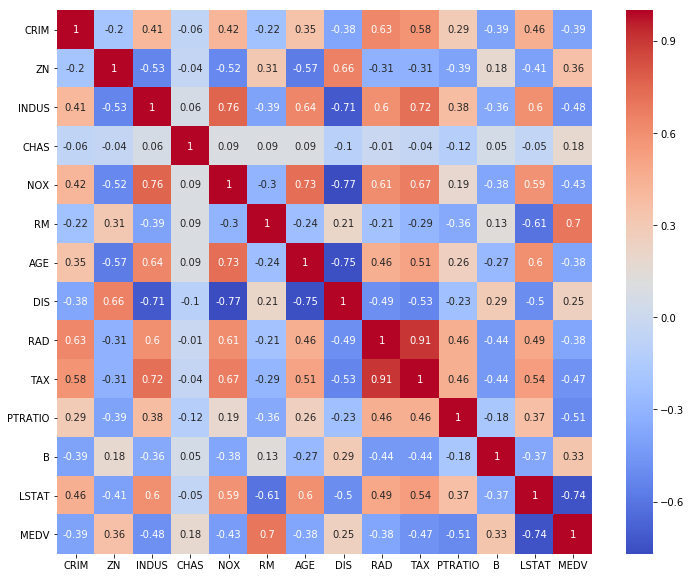

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr().round(2),cmap='coolwarm',annot=True)

In [6]:
boston = pd.DataFrame(np.c_[data['LSTAT'], data['RM'], data['MEDV']], columns = ['LSTAT','RM','MEDV'])

In [7]:
boston.head()

,LSTAT,RM,MEDV
0,4.98,6.575,24.0
1,9.14,6.421,21.6
2,4.03,7.185,34.7
3,2.94,6.998,33.4
4,5.33,7.147,36.2


In [8]:
def featureNormalization(X):

    mean=np.mean(X,axis=0) 
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

boston_n=boston.values
m=len(boston_n[:,-1])
X=boston_n[:,0:2].reshape(m,2)
X, mean_X, std_X = featureNormalization(X)
X = np.append(np.ones((m,1)),X,axis=1)
y=boston_n[:,-1].reshape(m,1)
theta=np.zeros((3,1))

In [9]:
def computeCost(X,y,theta):
    
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [10]:
computeCost(X,y,theta)

296.0734584980237

In [11]:
def gradientDescent(X,y,theta,alpha,num_iters):
     
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

In [12]:
theta,J_history = gradientDescent(X,y,theta,0.01,300)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1 + "+str(round(theta[2,0],2))+"x2");

h(x) =21.43 + -4.39x1 + 3.7x2


In [13]:
theta

array([[21.42777736],
       [-4.39399943],
       [ 3.70280712]])

Text(0.5, 1.0, 'Cost function using Gradient Descent')

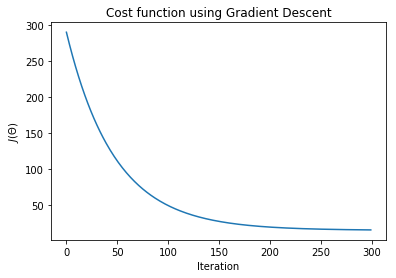

In [14]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [15]:
computeCost(X,y,theta)

15.877921011926297

In [16]:
predictions = X.dot(theta)

In [17]:
# sum of square of residuals
ssr = np.sum((predictions - y)**2)

#  total sum of squares
sst = np.sum((y - np.mean(y))**2)

# R2 score
r2_score = 1 - (ssr/sst)

In [18]:
print(' R2 score =' +str(round(r2_score,3)))

 R2 score =0.624


In [19]:
# mean squared error
mse = np.sum((predictions - y)**2)

# root mean squared error
# m is the number of training examples
rmse = np.sqrt(mse/m)

In [20]:
print('MSE = ', mse, 'RMSE = ', rmse)

MSE =  16068.456064069414 RMSE =  5.635232206737589


Some prediction:

In [21]:
def predict(x,theta):
    
    predictions= np.dot(theta.transpose(),x)
    
    return predictions[0]

In [24]:
x_new1=np.array([8.25,5.50])
x_new1=np.append(np.ones(1),x_new1)
predict_new1=predict(x_new1,theta)

print(predict_new1)

5.542721238451929


For LSTAT = 8.25 and RM = 5.50, we predict MEDV of 5.54***